In [1]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("=== Spotify Million Playlist Dataset - Data Exploration ===")

=== Spotify Million Playlist Dataset - Data Exploration ===


## 1. Data Loading and Initial Inspection

In [3]:
# Load the JSON slice file
data_path = "../data/raw/data/mpd.slice.1000-1999.json"

print("Loading dataset...")
try:
    with open(data_path, 'r', encoding='utf-8') as f:
        dataset = json.load(f)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Dataset file not found. Please check the path.")
    print("Expected path:", data_path)

# Basic dataset information
print(f"\nDataset Info:")
print(f"Number of playlists: {len(dataset['playlists'])}")
print(f"Dataset slice: {dataset['info']['slice']}")
print(f"Generated on: {dataset['info']['generated_on']}")
print(f"Version: {dataset['info']['version']}")

Loading dataset...
✓ Dataset loaded successfully!

Dataset Info:
Number of playlists: 1000
Dataset slice: 1000-1999
Generated on: 2017-12-03 08:41:42.057563
Version: v1


## 2. Playlist-Level Analysis


=== PLAYLIST ANALYSIS ===
Playlist Statistics:
               pid   modified_at   num_tracks   num_albums  num_followers  \
count  1000.000000  1.000000e+03  1000.000000  1000.000000    1000.000000   
mean   1499.500000  1.476685e+09    66.622000    49.200000       1.663000   
std     288.819436  3.677046e+07    53.804349    39.174975       4.010426   
min    1000.000000  1.335053e+09     5.000000     3.000000       1.000000   
25%    1249.750000  1.460074e+09    26.000000    20.000000       1.000000   
50%    1499.500000  1.490314e+09    49.500000    37.000000       1.000000   
75%    1749.250000  1.505434e+09    92.000000    68.000000       2.000000   
max    1999.000000  1.509494e+09   246.000000   229.000000      87.000000   

        num_edits   duration_ms  num_artists  
count  1000.00000  1.000000e+03  1000.000000  
mean     18.00800  1.555199e+07    38.178000  
std      21.80595  1.268233e+07    30.491836  
min       2.00000  1.016953e+06     3.000000  
25%       5.00000  6.06

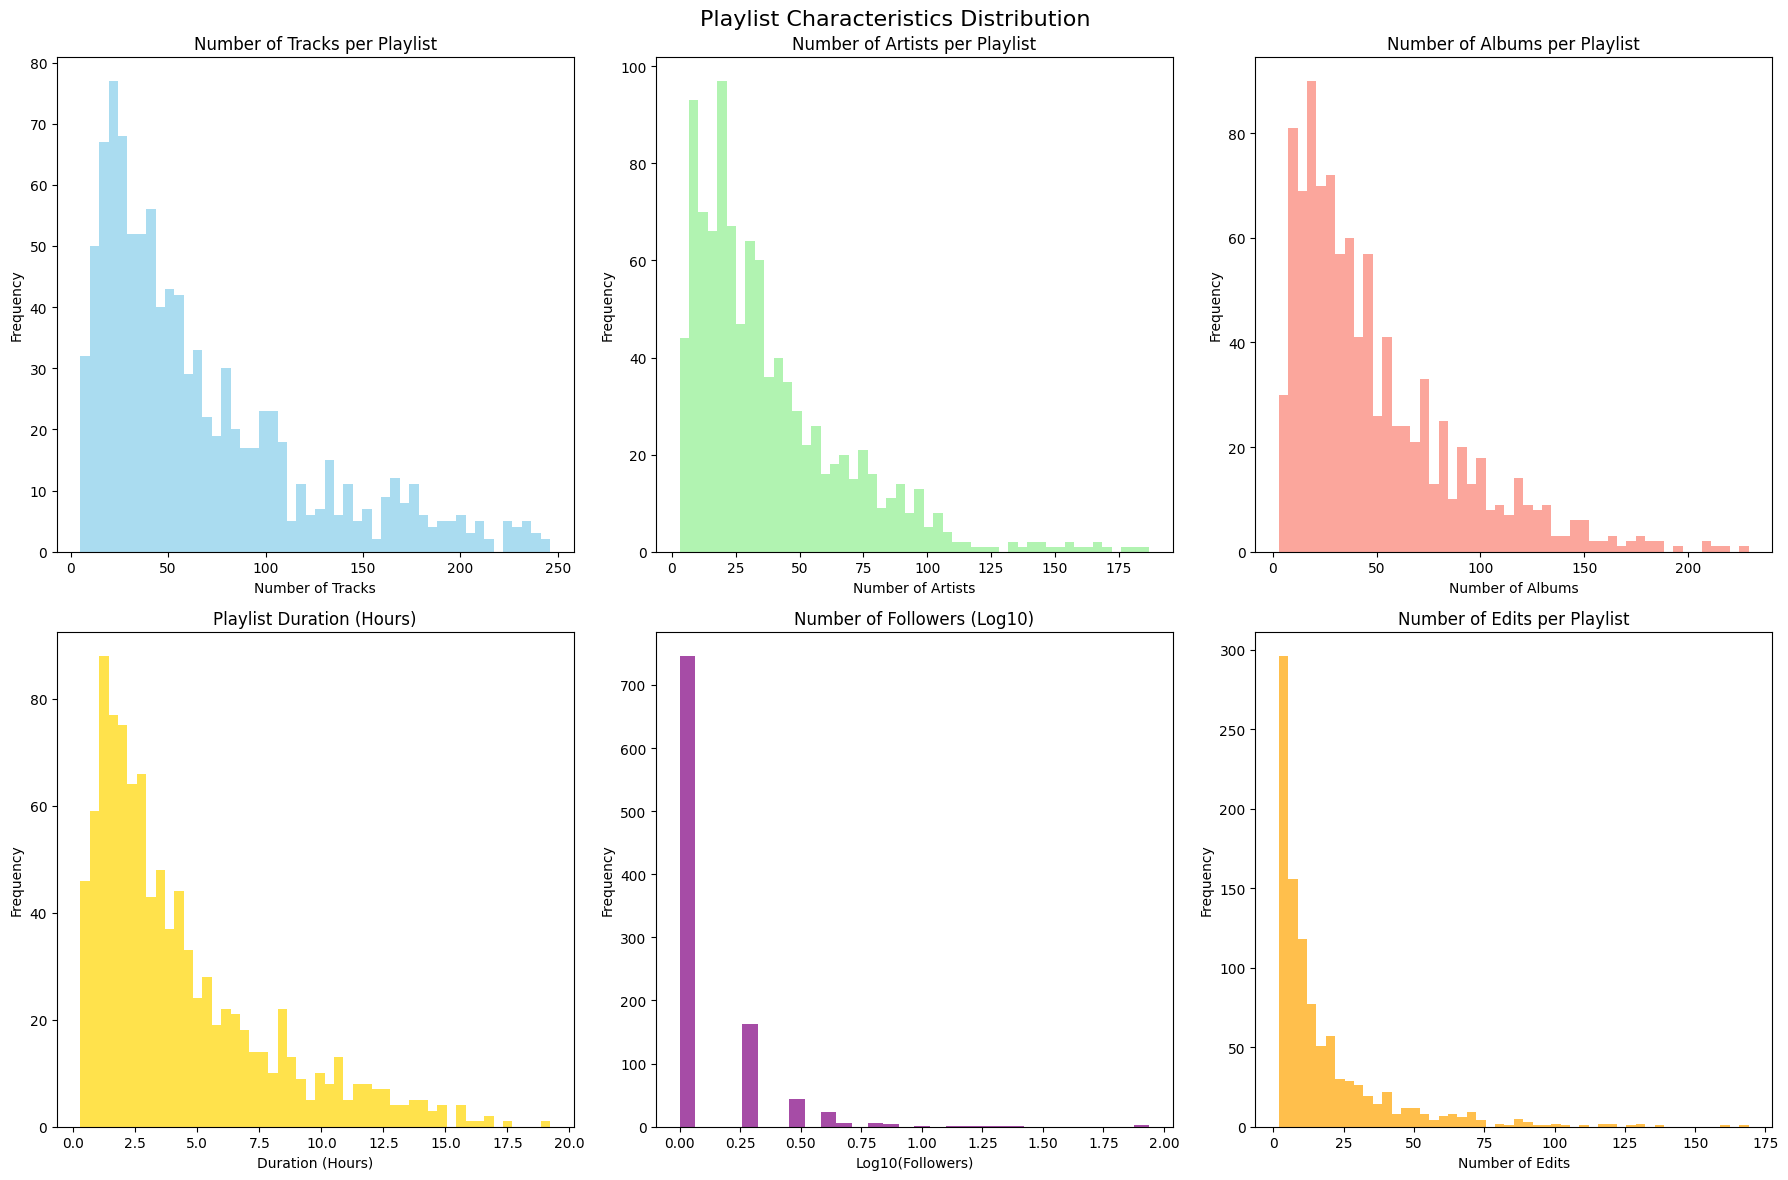

In [4]:
playlists = dataset['playlists']
print(f"\n=== PLAYLIST ANALYSIS ===")

# Extract playlist metadata
playlist_data = []
for playlist in playlists:
    playlist_info = {
        'pid': playlist['pid'],
        'name': playlist['name'],
        'collaborative': playlist['collaborative'],
        'modified_at': playlist['modified_at'],
        'num_tracks': playlist['num_tracks'],
        'num_albums': playlist['num_albums'],
        'num_followers': playlist['num_followers'],
        'num_edits': playlist['num_edits'],
        'duration_ms': playlist['duration_ms'],
        'num_artists': playlist['num_artists']
    }
    playlist_data.append(playlist_info)

playlist_df = pd.DataFrame(playlist_data)

# Basic statistics
print("Playlist Statistics:")
print(playlist_df.describe())

# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Playlist Characteristics Distribution', fontsize=16)

# Number of tracks per playlist
axes[0, 0].hist(playlist_df['num_tracks'], bins=50, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Number of Tracks per Playlist')
axes[0, 0].set_xlabel('Number of Tracks')
axes[0, 0].set_ylabel('Frequency')

# Number of artists per playlist
axes[0, 1].hist(playlist_df['num_artists'], bins=50, alpha=0.7, color='lightgreen')
axes[0, 1].set_title('Number of Artists per Playlist')
axes[0, 1].set_xlabel('Number of Artists')
axes[0, 1].set_ylabel('Frequency')

# Number of albums per playlist
axes[0, 2].hist(playlist_df['num_albums'], bins=50, alpha=0.7, color='salmon')
axes[0, 2].set_title('Number of Albums per Playlist')
axes[0, 2].set_xlabel('Number of Albums')
axes[0, 2].set_ylabel('Frequency')

# Duration in hours
playlist_df['duration_hours'] = playlist_df['duration_ms'] / (1000 * 60 * 60)
axes[1, 0].hist(playlist_df['duration_hours'], bins=50, alpha=0.7, color='gold')
axes[1, 0].set_title('Playlist Duration (Hours)')
axes[1, 0].set_xlabel('Duration (Hours)')
axes[1, 0].set_ylabel('Frequency')

# Number of followers (log scale)
non_zero_followers = playlist_df[playlist_df['num_followers'] > 0]['num_followers']
axes[1, 1].hist(np.log10(non_zero_followers), bins=30, alpha=0.7, color='purple')
axes[1, 1].set_title('Number of Followers (Log10)')
axes[1, 1].set_xlabel('Log10(Followers)')
axes[1, 1].set_ylabel('Frequency')

# Number of edits
axes[1, 2].hist(playlist_df['num_edits'], bins=50, alpha=0.7, color='orange')
axes[1, 2].set_title('Number of Edits per Playlist')
axes[1, 2].set_xlabel('Number of Edits')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 3. Track-Level Analysis


=== TRACK ANALYSIS ===
Total tracks in dataset: 66622
Unique tracks: 36175
Unique artists: 10303
Unique albums: 20212

Popularity Statistics:
Most popular track appears in 46 playlists
Most popular artist appears in 990 playlists
Most popular album appears in 164 playlists


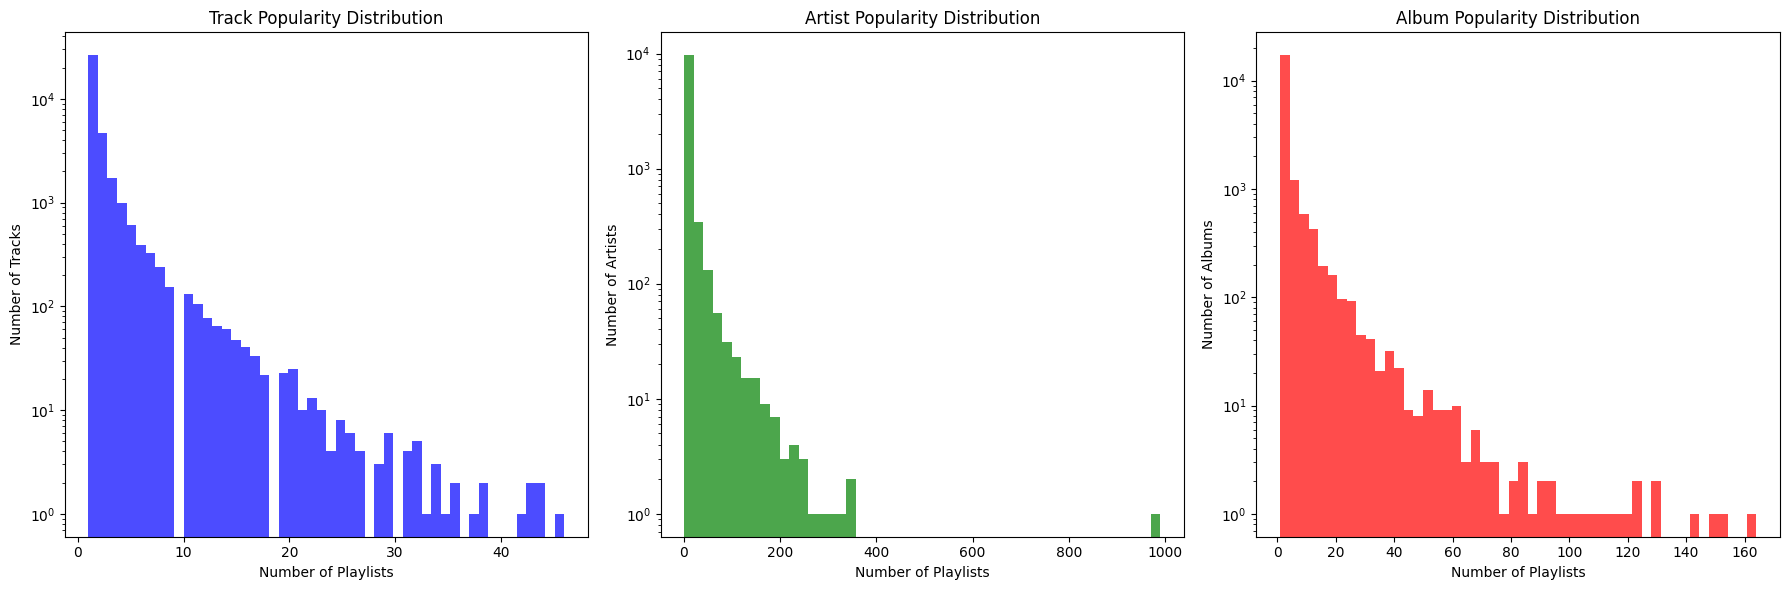

In [5]:
print(f"\n=== TRACK ANALYSIS ===")

# Extract all tracks
all_tracks = []
for playlist in playlists:
    pid = playlist['pid']
    for track in playlist['tracks']:
        track_info = {
            'pid': pid,
            'track_name': track['track_name'],
            'track_uri': track['track_uri'],
            'artist_name': track['artist_name'],
            'artist_uri': track['artist_uri'],
            'album_name': track['album_name'],
            'album_uri': track['album_uri'],
            'duration_ms': track['duration_ms'],
            'pos': track['pos']
        }
        all_tracks.append(track_info)

tracks_df = pd.DataFrame(all_tracks)
print(f"Total tracks in dataset: {len(tracks_df)}")
print(f"Unique tracks: {tracks_df['track_uri'].nunique()}")
print(f"Unique artists: {tracks_df['artist_uri'].nunique()}")
print(f"Unique albums: {tracks_df['album_uri'].nunique()}")

# Track popularity analysis
track_popularity = tracks_df['track_uri'].value_counts()
artist_popularity = tracks_df['artist_uri'].value_counts()
album_popularity = tracks_df['album_uri'].value_counts()

print(f"\nPopularity Statistics:")
print(f"Most popular track appears in {track_popularity.iloc[0]} playlists")
print(f"Most popular artist appears in {artist_popularity.iloc[0]} playlists")
print(f"Most popular album appears in {album_popularity.iloc[0]} playlists")

# Visualize popularity distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Track popularity distribution
axes[0].hist(track_popularity.values, bins=50, alpha=0.7, color='blue')
axes[0].set_title('Track Popularity Distribution')
axes[0].set_xlabel('Number of Playlists')
axes[0].set_ylabel('Number of Tracks')
axes[0].set_yscale('log')

# Artist popularity distribution
axes[1].hist(artist_popularity.values, bins=50, alpha=0.7, color='green')
axes[1].set_title('Artist Popularity Distribution')
axes[1].set_xlabel('Number of Playlists')
axes[1].set_ylabel('Number of Artists')
axes[1].set_yscale('log')

# Album popularity distribution
axes[2].hist(album_popularity.values, bins=50, alpha=0.7, color='red')
axes[2].set_title('Album Popularity Distribution')
axes[2].set_xlabel('Number of Playlists')
axes[2].set_ylabel('Number of Albums')
axes[2].set_yscale('log')

plt.tight_layout()
plt.show()

## 4. Top Items Analysis

In [6]:
print(f"\n=== TOP ITEMS ANALYSIS ===")

# Top 10 tracks
print("Top 10 Most Popular Tracks:")
top_tracks = track_popularity.head(10)
top_track_details = tracks_df[tracks_df['track_uri'].isin(top_tracks.index)].drop_duplicates('track_uri')
top_track_details = top_track_details.merge(
    top_tracks.reset_index().rename(columns={'track_uri': 'track_uri', 'count': 'playlist_count'}),
    on='track_uri'
)
for _, track in top_track_details.iterrows():
    print(f"  {track['track_name']} by {track['artist_name']} - {track['playlist_count']} playlists")

print(f"\nTop 10 Most Popular Artists:")
top_artists = artist_popularity.head(10)
top_artist_details = tracks_df[tracks_df['artist_uri'].isin(top_artists.index)].drop_duplicates('artist_uri')
top_artist_details = top_artist_details.merge(
    top_artists.reset_index().rename(columns={'artist_uri': 'artist_uri', 'count': 'playlist_count'}),
    on='artist_uri'
)
for _, artist in top_artist_details.iterrows():
    print(f"  {artist['artist_name']} - {artist['playlist_count']} playlists")



=== TOP ITEMS ANALYSIS ===
Top 10 Most Popular Tracks:
  Starboy by The Weeknd - 38 playlists
  Congratulations by Post Malone - 42 playlists
  Caroline by Aminé - 44 playlists
  1-800-273-8255 by Logic - 43 playlists
  Roses by The Chainsmokers - 36 playlists
  HUMBLE. by Kendrick Lamar - 44 playlists
  One Dance by Drake - 43 playlists
  Closer by The Chainsmokers - 38 playlists
  Bad and Boujee (feat. Lil Uzi Vert) by Migos - 46 playlists
  Broccoli (feat. Lil Yachty) by DRAM - 37 playlists

Top 10 Most Popular Artists:
  Drake - 990 playlists
  Kendrick Lamar - 337 playlists
  Kanye West - 314 playlists
  The Weeknd - 348 playlists
  Rihanna - 263 playlists
  Future - 279 playlists
  Logic - 240 playlists
  Eminem - 252 playlists
  J. Cole - 255 playlists
  The Beatles - 351 playlists


## 5. Graph Structure Analysis


=== GRAPH STRUCTURE ANALYSIS ===
Playlist-Track matrix shape: (1000, 36175)
Calculating track co-occurrence patterns...
Total track pairs with co-occurrence: 3307369
Max co-occurrence: 23
Average co-occurrence: 1.10


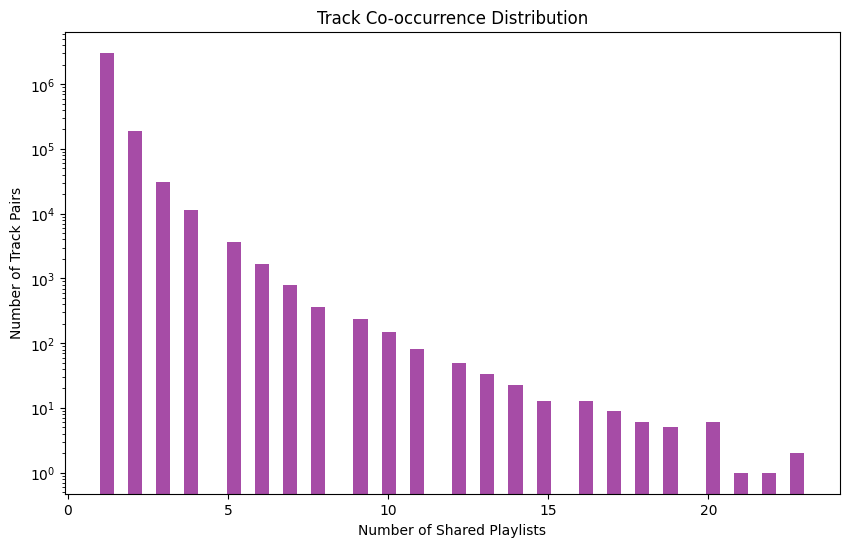

In [7]:
print(f"\n=== GRAPH STRUCTURE ANALYSIS ===")

# Create playlist-track co-occurrence matrix (simplified)
playlist_track_matrix = tracks_df.groupby(['pid', 'track_uri']).size().unstack(fill_value=0)
print(f"Playlist-Track matrix shape: {playlist_track_matrix.shape}")

# Calculate track co-occurrence within playlists
print("Calculating track co-occurrence patterns...")
track_cooccurrence = defaultdict(int)
for playlist in playlists:
    track_uris = [track['track_uri'] for track in playlist['tracks']]
    # Count pairs of tracks that appear together
    for i, track1 in enumerate(track_uris):
        for track2 in track_uris[i+1:]:
            if track1 != track2:
                pair = tuple(sorted([track1, track2]))
                track_cooccurrence[pair] += 1

print(f"Total track pairs with co-occurrence: {len(track_cooccurrence)}")
cooccurrence_counts = list(track_cooccurrence.values())
print(f"Max co-occurrence: {max(cooccurrence_counts)}")
print(f"Average co-occurrence: {np.mean(cooccurrence_counts):.2f}")

# Visualize co-occurrence distribution
plt.figure(figsize=(10, 6))
plt.hist(cooccurrence_counts, bins=50, alpha=0.7, color='purple')
plt.title('Track Co-occurrence Distribution')
plt.xlabel('Number of Shared Playlists')
plt.ylabel('Number of Track Pairs')
plt.yscale('log')
plt.show()

## 6. Data Quality Assessment

In [8]:
print(f"\n=== DATA QUALITY ASSESSMENT ===")

# Check for missing values in tracks
print("Missing values in track data:")
print(f"Track names: {tracks_df['track_name'].isna().sum()}")
print(f"Artist names: {tracks_df['artist_name'].isna().sum()}")
print(f"Album names: {tracks_df['album_name'].isna().sum()}")
print(f"Duration: {tracks_df['duration_ms'].isna().sum()}")

# Check for duplicates
print(f"\nDuplicate tracks within same playlist: {len(tracks_df) - len(tracks_df.drop_duplicates(['pid', 'track_uri']))}")

# Duration analysis
print(f"\nTrack Duration Analysis:")
tracks_df['duration_min'] = tracks_df['duration_ms'] / (1000 * 60)
print(f"Average track duration: {tracks_df['duration_min'].mean():.2f} minutes")
print(f"Min duration: {tracks_df['duration_min'].min():.2f} minutes")
print(f"Max duration: {tracks_df['duration_min'].max():.2f} minutes")

# Identify potential data issues
very_short_tracks = tracks_df[tracks_df['duration_min'] < 0.5]
very_long_tracks = tracks_df[tracks_df['duration_min'] > 10]
print(f"Very short tracks (<30s): {len(very_short_tracks)}")
print(f"Very long tracks (>10min): {len(very_long_tracks)}")


=== DATA QUALITY ASSESSMENT ===
Missing values in track data:
Track names: 0
Artist names: 0
Album names: 0
Duration: 0

Duplicate tracks within same playlist: 890

Track Duration Analysis:
Average track duration: 3.89 minutes
Min duration: 0.00 minutes
Max duration: 79.82 minutes
Very short tracks (<30s): 44
Very long tracks (>10min): 161


## 7. Playlist Name Analysis

In [9]:
print(f"\n=== PLAYLIST NAME ANALYSIS ===")

# Analyze playlist names
playlist_names = [p['name'] for p in playlists if p['name']]
print(f"Playlists with names: {len(playlist_names)}")

# Most common words in playlist names
from collections import Counter
import re

# Extract words from playlist names
all_words = []
for name in playlist_names:
    # Simple word extraction (lowercase, remove special chars)
    words = re.findall(r'\b\w+\b', name.lower())
    all_words.extend(words)

word_counts = Counter(all_words)
print("Most common words in playlist names:")
for word, count in word_counts.most_common(20):
    print(f"  {word}: {count}")


=== PLAYLIST NAME ANALYSIS ===
Playlists with names: 1000
Most common words in playlist names:
  country: 38
  music: 32
  chill: 27
  summer: 23
  rock: 21
  songs: 20
  playlist: 19
  new: 17
  party: 16
  good: 16
  mix: 15
  rap: 14
  2016: 13
  the: 13
  jams: 12
  workout: 12
  christmas: 11
  oldies: 11
  fall: 10
  dance: 10


## 8. Summary Statistics for Graph Construction

In [10]:
print(f"\n=== GRAPH CONSTRUCTION INSIGHTS ===")

# Statistics relevant for graph neural network construction
print("Key statistics for GNN:")
print(f"• Nodes (tracks): {tracks_df['track_uri'].nunique()}")
print(f"• Nodes (playlists): {len(playlists)}")
print(f"• Edges (playlist-track): {len(tracks_df)}")
print(f"• Average tracks per playlist: {tracks_df.groupby('pid').size().mean():.2f}")
print(f"• Average playlists per track: {tracks_df.groupby('track_uri').size().mean():.2f}")

# Sparsity analysis
total_possible_edges = len(playlists) * tracks_df['track_uri'].nunique()
actual_edges = len(tracks_df)
sparsity = (1 - actual_edges / total_possible_edges) * 100
print(f"• Graph sparsity: {sparsity:.4f}%")

print(f"\n=== DATA EXPLORATION COMPLETE ===")


=== GRAPH CONSTRUCTION INSIGHTS ===
Key statistics for GNN:
• Nodes (tracks): 36175
• Nodes (playlists): 1000
• Edges (playlist-track): 66622
• Average tracks per playlist: 66.62
• Average playlists per track: 1.84
• Graph sparsity: 99.8158%

=== DATA EXPLORATION COMPLETE ===
